## Project 1
Al Haque, Taha Ahmed

Data has been identified from the Animal Social Network Repository which is a large collection of animal network data that is extracted from various different scientific publications.

While looking through the repository there are certain datasets that are categorical with gender of the animal being recorded. One of these networks is an observation set of the reproduction habits of captive junglefowl obtained from a 2017 study. We will be taking the data from a group within the study and attempting to see what role gender plays within the reproductive habits of junglefowl.

We will look at group 5 of the reproductive habits of junglefowl

In [1]:
## Import The Libraries..

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

### Import the data
Our data is contained in a graphml file and we will use read_graphml function to read this file and save it in G as a Graph object..  We can see that this graph is small it contains 22 nodes and 93 edges. 

In [2]:
G = nx.read_graphml("C:\\Users\\Al Haque\\OneDrive\\Desktop\\Data 620 Web Analytics\\junglefowl_mcdonald_sexual_network_group5.graphml")

print(G)

Graph with 22 nodes and 93 edges


### Analyzing The network
Here we will take a glimpse at some of the nodes and edges that are within the network. Interestingly, we can see that each Male has more attributes as compared to Females where only their sex is recorded

In [3]:
#G.nodes(data = True)

for s,t in G.nodes(data = True):
    print(s,t)

D9M {'SEX': 'MALE', 'Group': 5.0, 'T': 2.0, 'M': 7.0, 'N': 4.285714286, 'P': 0.066666667, 'SCI': 7.427368421000001, 'SCIw': 12.92695359, 'ave_agg': 12.88888889, 'male_age': 2.0, 'ave_ramting': 1.714285714, 'std_T': 0.4, 'std_M': 0.752688172, 'std_N': 1.044065175, 'std_P': 0.562727264, 'std_SCI': 0.955036333, 'std_SCIw': 0.759407907, 'std_ave_agg': 0.845873865, 'std_male_age': -0.41403933600000004, 'std_ave_remating': -7.308734617000001}
66F {'SEX': 'FEMALE'}
J15M {'SEX': 'MALE', 'Group': 5.0, 'T': 9.0, 'M': 11.0, 'N': 5.181818182, 'P': 0.15789473699999998, 'SCI': 7.611202636, 'SCIw': 7.079621575, 'ave_agg': 2.444444444, 'male_age': 1.0, 'ave_ramting': 3.9090909089999997, 'std_T': 1.5, 'std_M': 1.1827956990000001, 'std_N': 1.032328172, 'std_P': 1.343551865, 'std_SCI': 0.972255098, 'std_SCIw': 0.728444318, 'std_ave_agg': -0.645153882, 'std_male_age': -0.774596669, 'std_ave_remating': -4.687599747}
37M {'SEX': 'MALE', 'Group': 5.0, 'T': 1.0, 'M': 2.0, 'N': 6.0, 'P': 0.083333333, 'SCI': 5.

In [4]:
## Grab the Sex attributes for each youngfowl.. 
node_data = [(s,t['SEX']) for s,t in G.nodes(data = True)]

node_df = pd.DataFrame(node_data,columns = ['YoungFowl','Sex'])

node_df.head(10)

,YoungFowl,Sex
0,D9M,MALE
1,66F,FEMALE
2,J15M,MALE
3,37M,MALE
4,B26M,MALE
5,C7M,MALE
6,J7M,MALE
7,G4M,MALE
8,B35,FEMALE
9,J6M,MALE


### Visualize The Network
Here we color-coded the nodes where Male youngfowls are colored steelblue and females are colored coral, the edges between nodes represent fluid exchanges or insemination by the males youngfowls to the female youngfowls. It seems males were encouraged to have multiple mates as shown by the networks hence females have mated with multiple male youngfowls.

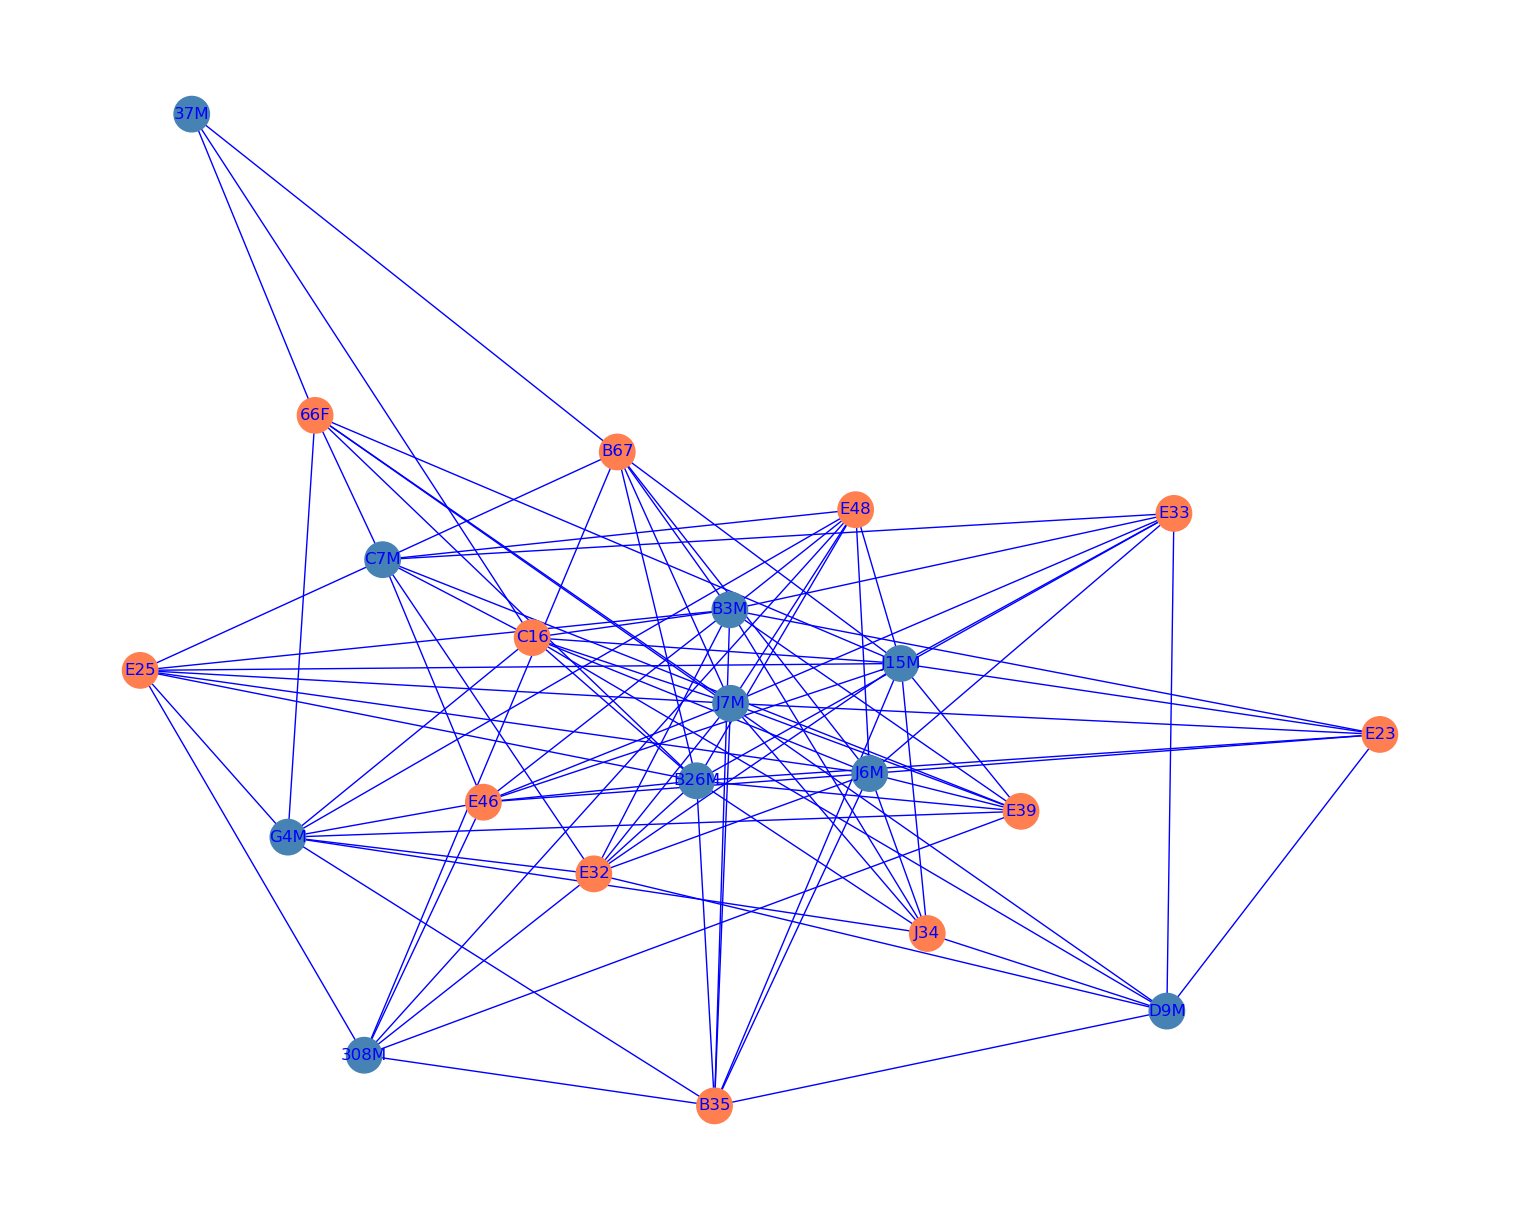

In [5]:
## let's visualize it.., the network appears rather messy.. 

colors_list = [] 

for index,row in node_df.iterrows():
    if row['Sex'] == 'MALE':
        colors_list.append('steelblue')
    else:
        colors_list.append('coral')

plt.figure(figsize= (15,12))
nx.draw(G,node_color = colors_list,edge_color = 'b',with_labels = True,font_color = 'b',node_size = 650)

The relationship between nodes represent a male and female younfowl mating, the weights indicates the number of fluids exchanged according to the documentation.. 

In [6]:
edge_list = [(s,t,w['weight']) for s,t,w in G.edges(data=True)]

edge_df = pd.DataFrame(edge_list,columns = ['Source','Target','Weight'])

edge_df.head(10)

,Source,Target,Weight
0,D9M,66F,1
1,D9M,B35,1
2,D9M,C16,1
3,D9M,E23,1
4,D9M,E32,2
5,D9M,E33,1
6,D9M,J34,5
7,66F,J15M,2
8,66F,37M,1
9,66F,B26M,1


### Degree Centrality
The degree centrality is measuring the number of connections a node has. In this case we will measure which youngfowls are popular or have frequent mates. 
The degree_df shows that Male YoungFowls J15M,B26M and J7M have the highest degree centrality as compared to to the other youngfowls. It seems Male youngfowls tend to have a higher degree centrality then female youngfowls.

In [7]:
## Create a df for degree_centrality
deg_list = list(nx.degree_centrality(G).items())
df_deg = pd.DataFrame(deg_list,columns = ['YoungFowl','Degree_Centrality']).sort_values(by = 'Degree_Centrality',ascending = False)
df_deg.head(10)

,YoungFowl,Degree_Centrality
2,J15M,0.571429
4,B26M,0.571429
6,J7M,0.571429
11,B3M,0.523810
9,J6M,0.523810
16,E32,0.428571
5,C7M,0.428571
7,G4M,0.428571
13,C16,0.428571
20,E48,0.380952


### Eigenvector Centrality
Eigenvector Centrality is a recursive version of the degree centrality i.e it provides a way to assess the importance of nodes based on not only by their direct connections but also based on the centraltiy of the neighbors. In this case it seems the J15M, B26M and J7M have the highest values out of all the other youngfowls. 

In [8]:
eig_list = list(nx.eigenvector_centrality(G).items())
eig_df = pd.DataFrame(eig_list,columns = ['YoungFowl','Eigencentrality']).sort_values(by = 'Eigencentrality',ascending = False)
eig_df.head(10)

,YoungFowl,Eigencentrality
2,J15M,0.273560
4,B26M,0.273560
6,J7M,0.273560
11,B3M,0.255141
9,J6M,0.255141
16,E32,0.232951
13,C16,0.221367
15,E25,0.215622
20,E48,0.215622
19,E46,0.215622


### Merging DataFrames
Let's merge the centrality dataframes with the gender dataframe and compare centrality measures between gender

In [9]:
## Let's merge the data-frame and compare centrality measure between genders.. 
merged_df = pd.merge(node_df,df_deg,on = 'YoungFowl',how = 'inner')

merged_df1 = pd.merge(merged_df,eig_df,on = 'YoungFowl',how = 'inner')

merged_df1.head(10)

,YoungFowl,Sex,Degree_Centrality,Eigencentrality
0,D9M,MALE,0.333333,0.154373
1,66F,FEMALE,0.333333,0.164087
2,J15M,MALE,0.571429,0.273560
3,37M,MALE,0.142857,0.065638
4,B26M,MALE,0.571429,0.273560
5,C7M,MALE,0.428571,0.209965
6,J7M,MALE,0.571429,0.273560
7,G4M,MALE,0.428571,0.211112
8,B35,FEMALE,0.380952,0.209382
9,J6M,MALE,0.523810,0.255141


### Centrality Measurements Between Genders

In [10]:
## Calculate average degree
merged_df1.groupby('Sex')['Degree_Centrality'].mean()

Sex
FEMALE    0.369048
MALE      0.442857
Name: Degree_Centrality, dtype: float64

In [11]:
merged_df1.groupby('Sex')['Eigencentrality'].mean()

Sex
FEMALE    0.203086
MALE      0.214089
Name: Eigencentrality, dtype: float64

Looking at the centrality measures between sexes.., we can see that Male youngfowls have a slightly higher value than Female youngfowls.

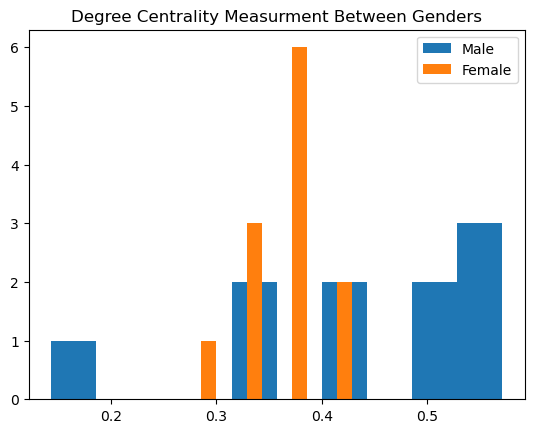

In [12]:
plt.hist(x = merged_df['Degree_Centrality'][merged_df1['Sex'] == 'MALE'],label = 'Male')
plt.hist(x = merged_df['Degree_Centrality'][merged_df1['Sex'] == 'FEMALE'],label = 'Female')
plt.legend()
plt.title('Degree Centrality Measurment Between Genders')
plt.show()

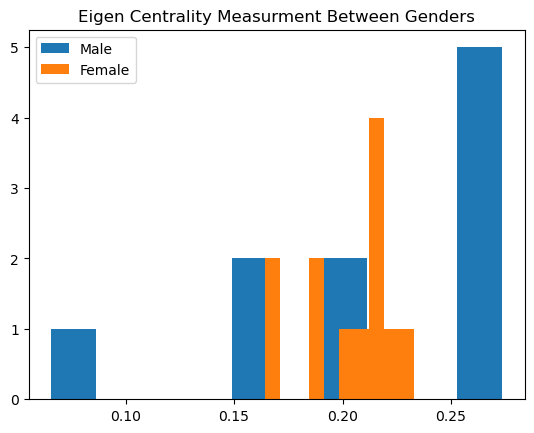

In [13]:
plt.hist(x = merged_df1['Eigencentrality'][merged_df1['Sex'] == 'MALE'],label = 'Male')
plt.hist(x = merged_df1['Eigencentrality'][merged_df1['Sex'] == 'FEMALE'],label = 'Female')
plt.legend()
plt.title('Eigen Centrality Measurment Between Genders')
plt.show()

### T-test
You might want to determine if there are any differences in your calculated centrality measures between the two sexes. So we will use a t-test to determine if there is any difference between the two sexes.

Our null hypothesis is: There is no difference between our centrality measures between the two sexes


Our alternate hypothesis: There is a difference between the two sexes

In [14]:
## First we use the t-test for degree centrality
from scipy.stats import ttest_ind

t_stat,p_val = ttest_ind(merged_df1['Degree_Centrality'][merged_df1['Sex'] == 'MALE'],merged_df1['Degree_Centrality'][merged_df1['Sex'] == 'FEMALE'])

print(f"The t-statistic is: {t_stat}")
print(f"The p-value is: {p_val}")

The t-statistic is: 1.7421871560629032
The p-value is: 0.09683408551884093


In [15]:
## Then we will use the t-test for eigen centrality
t_stat,p_val = ttest_ind(merged_df1['Eigencentrality'][merged_df1['Sex'] == 'MALE'],merged_df1['Eigencentrality'][merged_df1['Sex'] == 'FEMALE'])

print(f"The t-statistic is: {t_stat}")
print(f"The p-value is: {p_val}")

The t-statistic is: 0.5316027002712941
The p-value is: 0.6008566067918913


Unsuprisingly, the p-value under the t-test tells us that we fail to reject the null hypothesis, thus we can say that there is no difference between the centrality measurments between Male and Female Youngfowls

### Works-Cited:
This is a link to the readme file of the network dataset containing the youngfowl, we used group5 network dataset
https://github.com/bansallab/asnr/blob/master/Networks/Aves/junglefowl_sexual_weighted/Readme.md

### Youtube Video

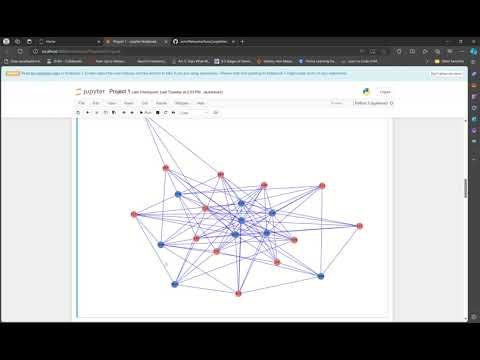

In [10]:
### Youtube Video
from IPython.display import YouTubeVideo

YouTubeVideo('RZEkOqlVon0',width = 500,height = 300)